## Analyse CBIS-DDSM data .csv files

#### All 4 csv files provided will be converted into one for easier management.

In [29]:
import pathlib as pt
import pandas as pd
import os

In [30]:
DATA_PATH  = pt.Path("D:\work\BreastTumorSegmentation\dataset")
MASS_TRAIN = "mass_case_description_train_set.csv"
MASS_TEST  = "mass_case_description_test_set.csv"
CALC_TRAIN = "calc_case_description_train_set.csv"
CALC_TEST  = "calc_case_description_test_set.csv"

#### Add the column _subset_ in order to remember the original split

In [31]:
mass_train_df = pd.read_csv(DATA_PATH/MASS_TRAIN)
mass_train_df['subset'] = 'train'

mass_test_df = pd.read_csv(DATA_PATH/MASS_TEST)
mass_test_df['subset'] = 'test'

calc_train_df = pd.read_csv(DATA_PATH/CALC_TRAIN)
calc_train_df['subset'] = 'train'

calc_test_df = pd.read_csv(DATA_PATH/CALC_TEST)
calc_test_df['subset'] = 'test'

#### Plot some statistics for a quick overview

In [32]:
data_df = pd.concat([mass_train_df, calc_train_df, mass_test_df, calc_test_df], sort=False).reset_index()
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3568 entries, 0 to 3567
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    3568 non-null   int64  
 1   patient_id               3568 non-null   object 
 2   breast_density           1696 non-null   float64
 3   left or right breast     3568 non-null   object 
 4   image view               3568 non-null   object 
 5   abnormality id           3568 non-null   int64  
 6   abnormality type         3568 non-null   object 
 7   mass shape               1692 non-null   object 
 8   mass margins             1636 non-null   object 
 9   assessment               3568 non-null   int64  
 10  pathology                3568 non-null   object 
 11  subtlety                 3568 non-null   int64  
 12  image file path          3568 non-null   object 
 13  cropped image file path  3568 non-null   object 
 14  ROI mask file path      

In [33]:
print("# unique patients", len(data_df['patient_id'].unique()))
print("# abnormality type", len(data_df['abnormality type'].unique()), data_df['abnormality type'].unique())
print("# image view", len(data_df['image view'].unique()), data_df['image view'].unique())
print("# pathologies", len(data_df['pathology'].unique()), data_df['pathology'].unique())

# unique patients 1566
# abnormality type 2 ['mass' 'calcification']
# image view 2 ['CC' 'MLO']
# pathologies 3 ['MALIGNANT' 'BENIGN' 'BENIGN_WITHOUT_CALLBACK']


Text(0, 0.5, 'Nr of patients')

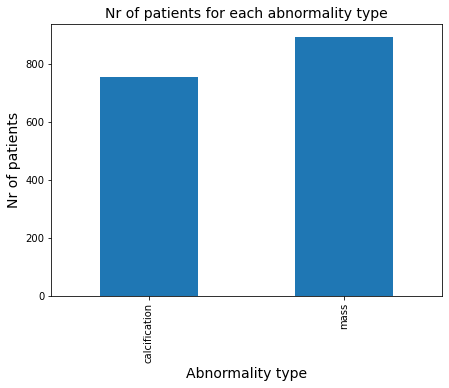

In [34]:
_df = data_df[['patient_id', 'abnormality type']].drop_duplicates().groupby('abnormality type').count()
ax = _df.unstack('abnormality type').plot(kind='bar', figsize=(7, 5))
ax.set_title("Nr of patients for each abnormality type", fontsize=14)
ax.set_xlabel("Abnormality type", fontsize=14)
ax.set_xticklabels(_df.index)
ax.set_ylabel("Nr of patients", fontsize=14)

Text(0, 0.5, 'Nr of patients')

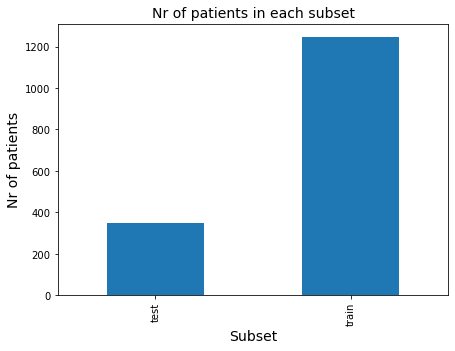

In [35]:
_df = data_df[['patient_id', 'subset']].drop_duplicates().groupby('subset').count()
ax = _df.unstack('subset').plot(kind='bar', figsize=(7, 5))
ax.set_title("Nr of patients in each subset", fontsize=14)
ax.set_xlabel("Subset", fontsize=14)
ax.set_xticklabels(_df.index)
ax.set_ylabel("Nr of patients", fontsize=14)

#### Select only the relevant information for the segmentation task

In [37]:
COLS = ["patient_id", "left or right breast", "image view", "abnormality id", "abnormality type", "pathology", "image file path", "ROI mask file path", "cropped image file path", "subset"]
data_df = data_df[COLS]

In [38]:
data_df

,patient_id,left or right breast,image view,abnormality id,abnormality type,pathology,image file path,ROI mask file path,cropped image file path,subset
0,P_00001,LEFT,CC,1,mass,MALIGNANT,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,train
1,P_00001,LEFT,MLO,1,mass,MALIGNANT,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,train
2,P_00004,LEFT,CC,1,mass,BENIGN,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,train
3,P_00004,LEFT,MLO,1,mass,BENIGN,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,train
4,P_00004,RIGHT,MLO,1,mass,BENIGN,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,train
...,...,...,...,...,...,...,...,...,...,...
3563,P_02464,RIGHT,MLO,1,calcification,MALIGNANT,Calc-Test_P_02464_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_02464_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_02464_RIGHT_MLO_1/1.3.6.1.4.1.9590...,test
3564,P_02498,RIGHT,CC,1,calcification,BENIGN,Calc-Test_P_02498_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_02498_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_02498_RIGHT_CC_1/1.3.6.1.4.1.9590....,test
3565,P_02498,RIGHT,MLO,1,calcification,BENIGN,Calc-Test_P_02498_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_02498_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_02498_RIGHT_MLO_1/1.3.6.1.4.1.9590...,test
3566,P_02501,RIGHT,CC,1,calcification,MALIGNANT,Calc-Test_P_02501_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_02501_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_02501_RIGHT_CC_1/1.3.6.1.4.1.9590....,test


#### Save the new .csv file that contains all the mammograms and masks

In [39]:
data_df.to_csv(DATA_PATH/"all_data.csv", index=False)